# BH Curve Representations
When we want to model magnetic saturation, we need to provide the FEM code with the non-linear BH curve of the material we wish to model. To ensure that the non-linear solver converges, it is essential that both the BH curve and its derivative are smooth and continuous. To achieve this goal, there are two general approaches to modeling the BH curve of a material.

In [18]:
using Plots

mu0 = 4e-7 * pi;

## Fitting to an Analytical Expression

## Using a Cubic Spline Interpolation
Instead of fitting the available data to a well-defined analytical expression, we can make a [cubic spline interpolation](https://www.geeksforgeeks.org/cubic-spline-interpolation/): find a curve with degree three or less connecting a set of data points. Splines are polynomial, and smooth and continuous across a given plot, with continuous first and second derivatives.

These properties make cubic spline interpolation suitable for modeling BH curves with shapes that cannot be represented in a simple analytical expression.

### Cubic Splines in Julia
Luckily, there are packages available which allow us to compute cubic splines (on unevenly spaced grids) and their derivatives. For example, [Dierckx.jl](https://github.com/kbarbary/Dierckx.jl).

In [1]:
using Dierckx

In [14]:
data = [0 0; 6.040268456375884 0.05019685039370081; 10.961968680089512 0.09940944881889768; 18.568232662192372 0.14862204724409445; 27.964205816554852 0.19586614173228345; 35.12304250559288 0.23720472440944879; 44.5190156599553 0.27460629921259844; 55.70469798657717 0.30413385826771655; 66.44295302013427 0.3297244094488189; 76.28635346756153 0.34940944881889757; 87.91946308724835 0.3631889763779528; 102.23713646532445 0.375; 115.21252796420583 0.38484251968503935; 132.66219239373606 0.39370078740157477; 145.6375838926175 0.4005905511811023; 159.06040268456383 0.40649606299212593; 170.24608501118576 0.4124015748031496; 186.3534675615213 0.41633858267716534; 200.447427293065 0.420275590551181]
H = data[:, 1];
B = data[:, 2];

BH_spline = Spline1D(H, B);

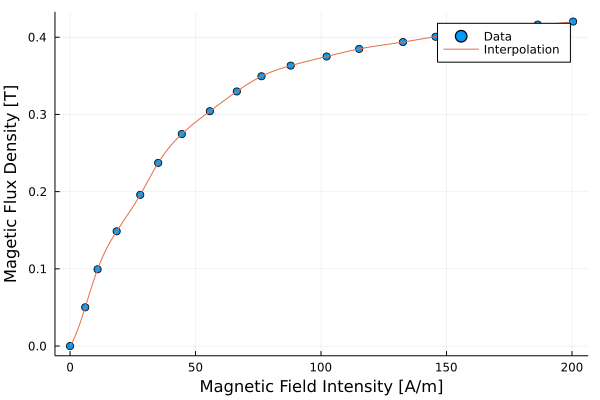

In [21]:
N_interp = 1000;
H_interp = minimum(H):(maximum(H) - minimum(H))/N_interp:maximum(H);
scatter(H, B, xlabel = "Magnetic Field Intensity [A/m]", ylabel = "Magetic Flux Density [T]", label = "Data")
plot!(H_interp, BH_spline(H_interp), label = "Interpolation")

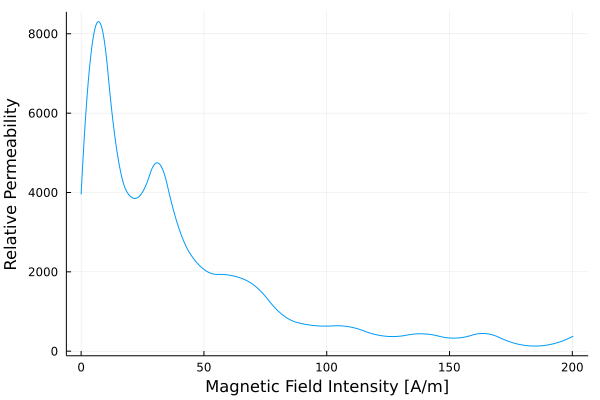

In [24]:
plot(H_interp, derivative(BH_spline, H_interp) / mu0, xlabel = "Magnetic Field Intensity [A/m]", ylabel = "Relative Permeability", legend = false)